In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Data Description:

In [2]:
#Reading kc_house training dataset
kc=pd.read_csv(r"C:\Users\MY PC\Desktop\e-files\Trimester-1\Machine_Learning\Term1 Assignments\wk3_kc_house_train_data.csv\wk3_kc_house_train_data.csv")

In [3]:
kc.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


In [4]:
kc.shape

(9761, 21)

In [5]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [6]:
kc1=kc.copy()

In [7]:
#Rearranging date for better understanding
kc1.date=kc1.date.apply(lambda x: x[0:4]+"/"+x[4:6]+"/"+x[6:8]) 

In [8]:
kc1.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,2014/12/09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,2014/05/12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,2014/05/27,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,2014/05/28,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,2014/10/07,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [9]:
#converting date to dateobject so it can be used for boolean comparison
kc1.date=pd.to_datetime(kc1.date) 

In [10]:
type(kc1.date)

pandas.core.series.Series

In [11]:
kc1.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [12]:
len(kc1.columns)

21

In [13]:
kc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null datetime64[ns]
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 1.6 MB


Observations:
    1.There are 9761 rows and 21 columns in the dataset.
    2.The dates column were altered to datetime format. 

#### Missing Value Analysis

In [14]:
kc1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
sum(kc1.isnull().sum())

0

Observation: There seems to be no null values.

## Univariate Analysis on possibly influencing variables:

In [16]:
kc1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Column ID

In [17]:
#Unique values inside id column
len(kc.id.value_counts())

9720

In [18]:
sum(kc.id.value_counts())

9761

This implies that 41 rows have same id value.Let's check a value

In [19]:
kc1.id.value_counts()[kc1.id.value_counts()>1]

795000620     3
109200390     2
1232000810    2
8682262400    2
3323059027    2
9222400605    2
5101402435    2
1781500435    2
2473380920    2
1523049207    2
1630700361    2
4443800385    2
251300110     2
8564860270    2
6021500970    2
6791200120    2
1524079093    2
705730280     2
6021501535    2
3332000615    2
2724049222    2
9809000020    2
7524400250    2
2231500030    2
1254200015    2
1139600270    2
2044500213    2
7227800055    2
1788800630    2
7853420110    2
9828200460    2
1545800290    2
2019200220    2
7129304540    2
1825069031    2
1788900230    2
8945100320    2
2143700830    2
1568100300    2
7856400240    2
Name: id, dtype: int64

In [20]:
#Analysing the repeated id rows
kc1[kc1.id==7856400240] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1187,7856400240,2014-06-27,1620000.0,4,3.0,3900,9750,1.0,0,4,...,10,2520,1380,1972,0,98006,47.5605,-122.158,3410,9450
1188,7856400240,2015-02-11,1650000.0,4,3.0,3900,9750,1.0,0,4,...,10,2520,1380,1972,0,98006,47.5605,-122.158,3410,9450


Same property with the change in price has been updated. So,we'll delete the previous rows with similar id.

In [21]:
kc2=kc1.copy()

In [22]:
#deletes the dupilcates keeping only the last row of variable
kc2 = kc2.drop_duplicates(subset='id',keep='last') 

In [23]:
sum(kc2.id.value_counts())

9720

In [24]:
len(kc2.id.value_counts())

9720

In [25]:
kc2[kc2.id==7856400240] #checking if correct row is deleted

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1188,7856400240,2015-02-11,1650000.0,4,3.0,3900,9750,1.0,0,4,...,10,2520,1380,1972,0,98006,47.5605,-122.158,3410,9450


### Column Date:

In [26]:
(kc2.date.value_counts())

2014-08-20    62
2015-04-28    61
2015-04-14    60
2014-06-26    60
2014-06-23    59
2014-10-28    59
2014-06-25    58
2014-05-20    57
2014-10-27    56
2014-10-14    56
2014-06-18    55
2014-07-25    55
2015-04-08    55
2015-05-04    55
2014-06-24    54
2014-08-12    53
2015-04-27    53
2014-07-08    53
2015-04-21    53
2015-03-17    53
2014-07-29    53
2015-03-27    52
2014-07-16    52
2015-04-07    52
2015-04-02    51
2014-11-13    51
2014-07-14    51
2014-07-10    50
2014-06-10    50
2014-09-24    50
              ..
2015-05-02     1
2014-06-29     1
2014-09-07     1
2015-02-16     1
2014-08-09     1
2015-01-25     1
2015-04-04     1
2015-02-14     1
2014-09-28     1
2015-02-01     1
2014-10-11     1
2015-01-19     1
2015-05-27     1
2015-02-15     1
2014-06-01     1
2014-07-19     1
2014-12-27     1
2015-02-07     1
2014-05-11     1
2014-08-10     1
2014-11-28     1
2015-03-07     1
2015-05-09     1
2014-08-23     1
2014-11-01     1
2014-05-31     1
2015-03-08     1
2015-05-10    

In [27]:
kc2[kc2.date>'2015/04/28']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
119,7960900060,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
121,6378500125,2015-05-01,436000.0,2,1.00,1040,7538,1.0,0,0,...,7,1040,0,1939,0,98133,47.7107,-122.352,1440,7530
141,3422059208,2015-05-11,390000.0,3,2.50,1930,64904,1.0,0,0,...,8,1930,0,1988,0,98042,47.3460,-122.157,2350,57500
195,305500140,2015-05-12,365000.0,3,2.50,2200,4052,2.0,0,0,...,8,2200,0,2005,0,98058,47.4362,-122.178,2310,5082
238,925059288,2015-05-07,750000.0,3,2.50,2400,7745,2.0,0,0,...,9,2400,0,2001,0,98033,47.6734,-122.173,2080,8615
245,1545807610,2015-04-29,270500.0,3,2.50,1780,7848,1.0,0,0,...,7,1320,460,1978,0,98038,47.3608,-122.056,1680,7848
246,1843200240,2015-05-05,200000.0,2,1.50,1360,1898,2.0,0,0,...,7,1360,0,1978,0,98092,47.2852,-122.190,1360,1898
249,6204420070,2015-05-01,452000.0,4,1.75,1570,8268,1.0,0,0,...,7,1570,0,1979,0,98011,47.7373,-122.197,1870,8190
256,4025300135,2015-05-08,451000.0,3,1.75,1790,9813,2.0,0,0,...,7,1790,0,1949,0,98155,47.7490,-122.305,1520,10125
285,6600700030,2015-05-06,525000.0,3,2.25,1490,9414,2.0,0,0,...,7,1490,0,1981,0,98052,47.6844,-122.113,1290,10125


In [28]:
kc2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.720000e+03,9.720000e+03,9720.000000,9720.000000,9720.000000,9.720000e+03,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,4.607988e+09,5.434231e+05,3.375823,2.117361,2087.773868,1.523944e+04,1.486728,0.008436,0.248354,3.416049,7.663889,1794.128086,293.645782,1970.843724,86.225926,98077.785700,47.560129,-122.214252,1993.268827,12836.199383
std,2.874756e+09,3.795059e+05,0.960915,0.773976,927.812691,4.134873e+04,0.532636,0.091465,0.787969,0.650255,1.182708,836.364886,442.782151,29.234219,405.779540,53.216785,0.140203,0.139826,687.503821,26566.739971
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.129275e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905095e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572350,-122.229000,1850.000000,7662.500000
75%,7.345200e+09,6.499925e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


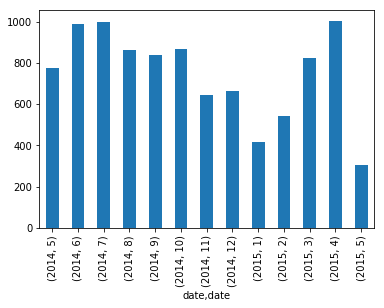

In [29]:
# checking if any month is influencing data collection
kc2['date'].groupby([kc2["date"].dt.year, kc2["date"].dt.month]).count().plot(kind="bar") 
plt.savefig("Date")

There seems to be no particular trend w.r.to date.

### Column Bathrooms

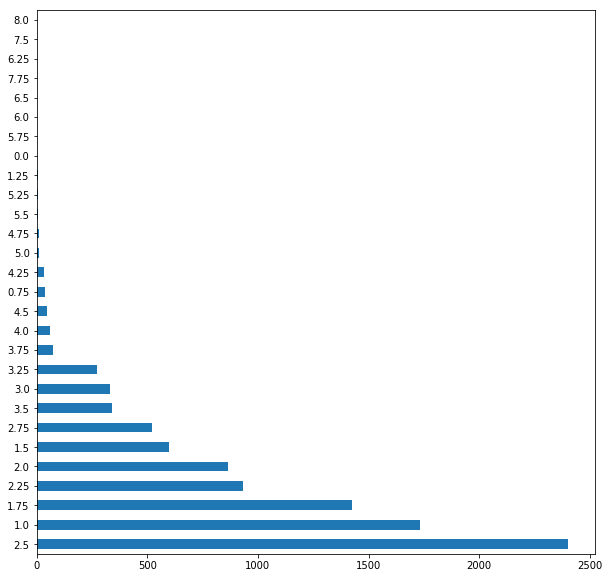

In [30]:
kc2.bathrooms.value_counts().plot(kind='barh',figsize=(10,10))
plt.savefig("Bathroom_unique")

In [31]:
len(kc2.bathrooms.value_counts())

28

In [32]:
#Calling a method for IQR with Upper & Lower cutoff values for Outliers
def IQR(x):
    iqr = x.quantile(0.75) - x.quantile(0.25)
    ub = x.quantile(0.75) + 1.5*iqr
    lb = x.quantile(0.25) - 1.5*iqr
    return(iqr,ub,lb)

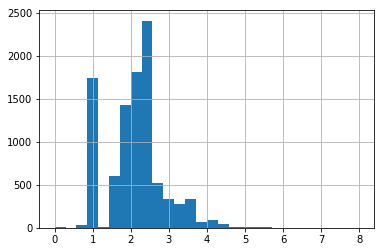

In [33]:
kc1.bathrooms.hist(bins=28)
plt.savefig("bathroom_hist")

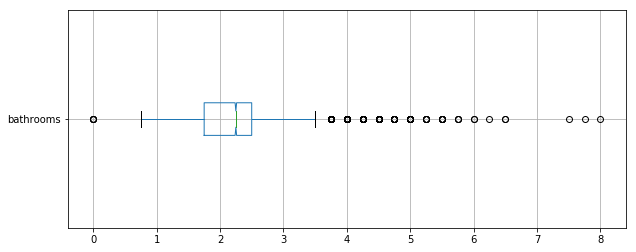

<Figure size 432x288 with 0 Axes>

In [34]:
kc1.boxplot(column="bathrooms", notch=True,figsize = (10,4),vert=False)
plt.show()
plt.savefig("Bathroom_boxplot")

In [35]:
IQR(kc2.bathrooms)

(0.75, 3.625, 0.625)

In [36]:
#No.of outliers above upper limit
len(kc2[kc2.bathrooms>3.625])

252

### Column Bedroom:

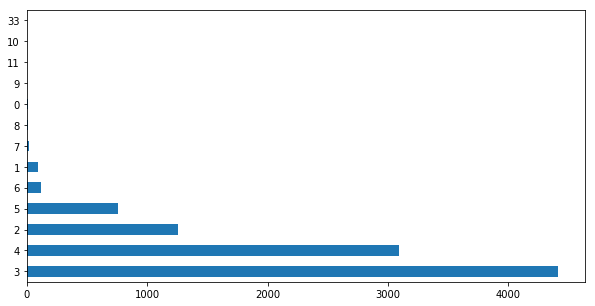

In [37]:
kc1.bedrooms.value_counts().plot(kind='barh',figsize=(10,5))
plt.savefig("Bedroom_unique")

In [38]:
len(kc1.bedrooms.value_counts())

13

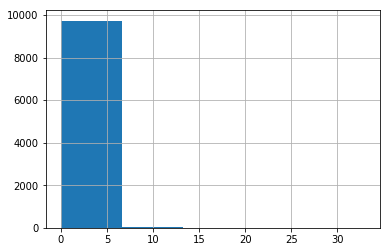

In [39]:
kc1.bedrooms.hist(bins=5)

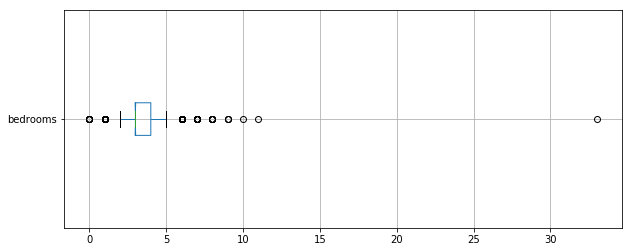

<Figure size 432x288 with 0 Axes>

In [40]:
kc1.boxplot(column="bedrooms", notch=True,figsize = (10,4),vert=False)
plt.show()
plt.savefig("bedroom_box")

In [41]:
IQR(kc2.bedrooms)

(1.0, 5.5, 1.5)

In [42]:
#lower Outliers
len(kc2[kc2.bedrooms<1.5])

94

In [43]:
#Upper Outliers
len(kc2[kc2.bedrooms>5.5]) # Outlier values

145

In [44]:
kc2[kc2.bedrooms==0] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2228,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
3177,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
4472,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4507,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8338,1222029077,2014-10-29,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
8840,3980300371,2014-09-26,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [45]:
kc2[kc2.bedrooms>20] #seems like there has been a typo error

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7204,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [46]:
kc2 = kc2[kc2.bedrooms != 33] #deleting the row

In [47]:
len(kc2) #checking if it has been deleted

9719

### Column Sqft_lot:

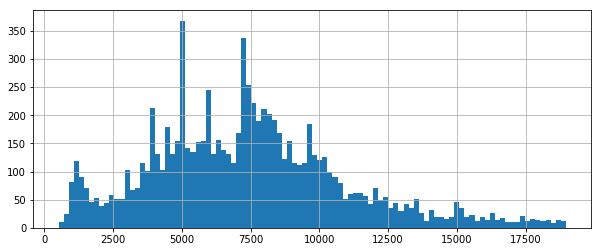

In [48]:
#splitting the histogram into two frames on a random value for observational purpose alone
(kc2.sqft_lot[kc2.sqft_lot<19000]).hist(bins=100,figsize=(10,4))
plt.savefig("Colum_sqft_lot1")

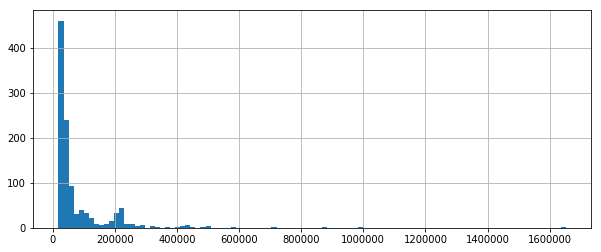

In [49]:
(kc2.sqft_lot[kc2.sqft_lot>=19000]).hist(bins=100,figsize=(10,4))
plt.savefig("Colum_sqft_lot2")

C:\Users\MY PC\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


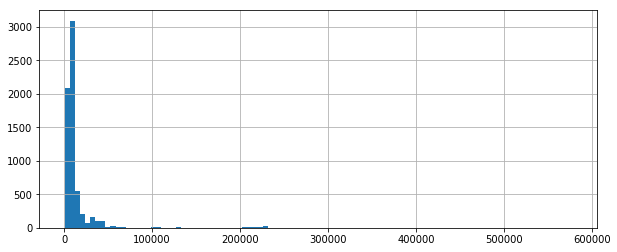

In [50]:
(kc2.sqft_lot[kc2.sqft_lot]).hist(bins=100,figsize=(10,4))

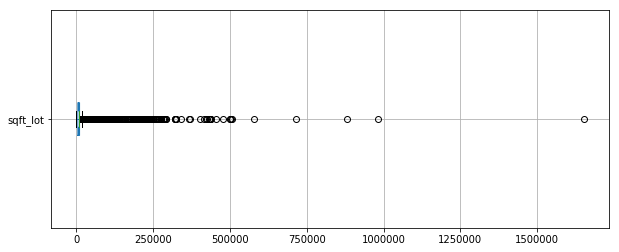

<Figure size 432x288 with 0 Axes>

In [51]:
kc2.boxplot(column="sqft_lot", notch=True,figsize = (10,4),vert=False)
plt.show()
plt.savefig("sqft_lot1_box")

In [52]:
IQR(kc2.sqft_lot)

(5560.0, 19000.0, -3240.0)

In [53]:
len(kc2[kc2.sqft_lot>19000.0]) # No. of outliers above Whiskers

1085

In [54]:
kc2.sqft_lot.corr(kc1.price)

0.09400020768474332

### Column Sqft_living:

In [55]:
#Unique values
len(kc2.sqft_living.value_counts())

730

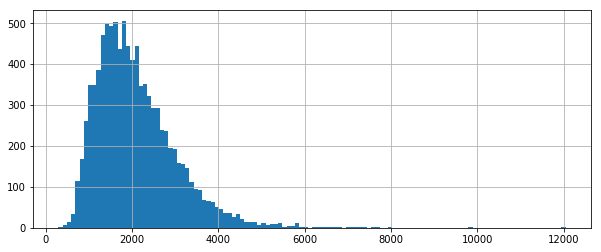

In [56]:
kc2.sqft_living.hist(figsize=(10,4),bins=120)
plt.savefig("sqft_living_hist")

In [57]:
len(kc2.sqft_living.value_counts()[kc2.sqft_living.value_counts()>50])

31

In [58]:
IQR(kc2.sqft_living)

(1150.0, 4295.0, -305.0)

In [59]:
#No.of Upper Outliers
len(kc2[kc2.sqft_living>4295])

240

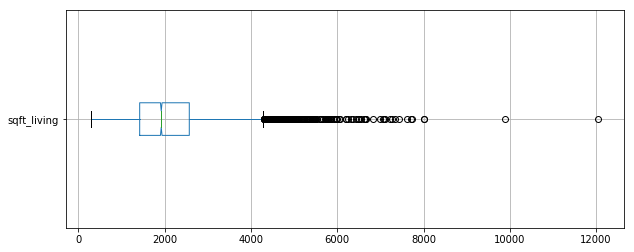

<Figure size 432x288 with 0 Axes>

In [60]:
kc2.boxplot(column="sqft_living", notch=True,figsize = (10,4),vert=False)
plt.show()
plt.savefig("sqft_living_box")

In [61]:
kc2[kc2.sqft_living>9000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3303,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
4235,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [62]:
kc2.sqft_living.corr(kc1.price) # it seems to have positive correlation with price

0.7050394175047043

In [63]:
kc2.sqft_living.corr(kc1.sqft_lot) # No multicollinaerity between these variables

0.16269505123394776

### Column sqft_living & sqft_basement

In [64]:
kc2.sqft_living.corr(kc2.sqft_above)

0.8790634989502913

In [65]:
kc2.sqft_living.corr(kc2.sqft_basement)

0.43501666191151744

Since sqft_living is the sum of sqft_above & sqft_basement and since there seems to be collinearity b/w these variables,we'll eliminate these values for model prediction

### Column Floor

In [66]:
kc2.floors.value_counts()

1.0    4837
2.0    3713
1.5     860
3.0     245
2.5      62
3.5       2
Name: floors, dtype: int64

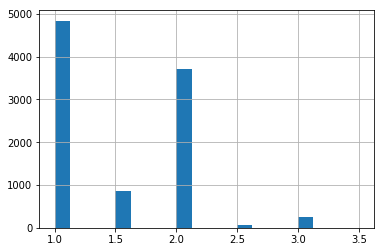

<Figure size 432x288 with 0 Axes>

In [67]:
kc2.floors.hist(bins=20)
plt.show()
plt.savefig("floor")

In [68]:
kc2[kc2.floors==3.5] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6756,8673400177,2015-04-02,525000.0,3,3.0,1730,1074,3.5,0,0,...,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
8377,1346300150,2014-10-20,3300000.0,8,4.0,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325


### Column Price:

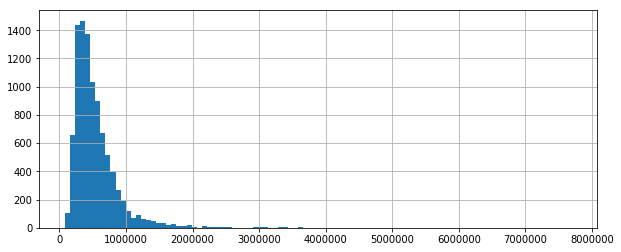

In [69]:
kc2.price.hist(bins=100,figsize=(10,4))
plt.savefig("Price_hist")

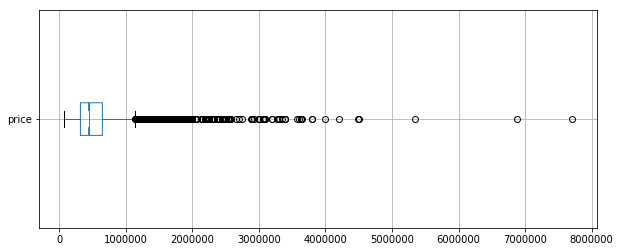

In [70]:
kc2.boxplot(column="price", notch=True,figsize = (10,4),vert=False)
plt.show()

In [71]:
IQR(kc2.price)

(329995.0, 1144987.5, -174992.5)

In [72]:
kc2[kc2.price>1144981.25]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
29,1802000060,2014-06-12,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
56,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
119,7960900060,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
120,4054500390,2014-10-07,1365000.0,4,4.75,5310,57346,2.0,0,0,...,11,5310,0,1989,0,98077,47.7285,-122.042,4180,47443
132,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
189,8678500060,2014-07-10,1550000.0,5,4.25,6070,171626,2.0,0,0,...,12,6070,0,1999,0,98024,47.5954,-121.950,4680,211267
216,8820902200,2014-11-13,1199000.0,4,2.75,4110,8400,2.0,0,1,...,9,3130,980,1928,2013,98125,47.7170,-122.281,2820,8400
220,2625069070,2015-04-10,1385000.0,4,3.25,4860,181319,2.5,0,0,...,9,4860,0,1993,0,98074,47.6179,-122.005,3850,181319


In [73]:
kc2.waterfront.value_counts()

0    9637
1      82
Name: waterfront, dtype: int64

In [74]:
kc2.view.value_counts()

0    8708
2     454
3     242
1     160
4     155
Name: view, dtype: int64

In [75]:
kc2.condition.value_counts()

3    6262
4    2604
5     767
2      76
1      10
Name: condition, dtype: int64

In [76]:
kc2.grade.value_counts()

7     4046
8     2698
9     1190
6      908
10     531
11     172
5      104
12      45
4       17
13       7
1        1
Name: grade, dtype: int64

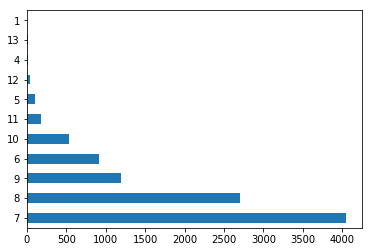

In [77]:
kc2.grade.value_counts().plot(kind='barh')

In [78]:
kc2[kc2.grade==13]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2473,7237501190,2014-10-10,1780000.0,4,3.25,4890,13402,2.0,0,0,...,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539
2736,1725059316,2014-11-20,2385000.0,4,4.00,6330,13296,2.0,0,2,...,13,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196
3194,853200010,2014-07-01,3800000.0,5,5.50,7050,42840,1.0,0,2,...,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
3303,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3613,1068000375,2014-09-23,3200000.0,6,5.00,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
4235,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
8644,2303900100,2014-09-11,3800000.0,3,4.25,5510,35000,2.0,0,4,...,13,4910,600,1997,0,98177,47.7296,-122.370,3430,45302


In [79]:
#Creating a new feature Building Age
kc2["building_age"]=2015-kc2["yr_built"] # Computing build age with year built
kc2.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_age
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,14
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,73
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,88
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,38


In [80]:
kc2.building_age.corr(kc1.price)

-0.05108358003897921

In [81]:
kc2[kc2.building_age==0] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_age
1905,8077100031,2015-04-22,631000.0,3,2.25,1670,1396,2.0,0,0,...,1250,420,2015,0,98115,47.6814,-122.288,1610,5191,0
3434,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,0
3682,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,0
3860,558100090,2015-03-12,628000.0,5,2.75,2600,8160,2.0,0,0,...,2600,0,2015,0,98133,47.7348,-122.340,1600,8160,0
6442,8156600210,2015-03-26,1285000.0,5,3.50,2980,5100,2.0,0,0,...,2370,610,2015,0,98115,47.6782,-122.299,1780,5100,0
6562,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,0
6776,2770602360,2015-04-21,671000.0,4,2.75,1890,1475,2.0,0,0,...,1200,690,2015,0,98199,47.6472,-122.383,1650,1682,0
7788,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,0
8959,9161100075,2015-03-18,673000.0,4,2.25,2580,2875,2.0,0,0,...,2580,0,2015,0,98116,47.5674,-122.392,1290,5750,0
9008,2768100510,2015-04-02,649000.0,3,2.00,1530,1442,3.0,0,0,...,1530,0,2015,0,98107,47.6692,-122.372,1620,1456,0


In [82]:
len(kc2.yr_renovated.value_counts()) # most of the buildings are not renovated.Hence this variable cannot be used.(Check val=0)

65

In [83]:
len(kc2.sqft_living15.value_counts())

588

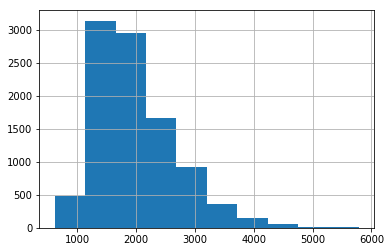

In [84]:
kc2.sqft_living15.hist()
plt.savefig("sqft_living15_hist")

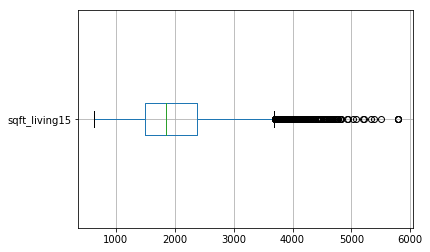

<Figure size 432x288 with 0 Axes>

In [85]:
kc2.boxplot(column="sqft_living15",vert=False)
plt.show()
plt.savefig("sqft_living15_box")

In [86]:
IQR(kc2.sqft_living15)

(880.0, 3690.0, 170.0)

In [87]:
len(kc2[kc2.sqft_living15>3690])

236

In [88]:
len(kc2.sqft_lot15.value_counts())

5147

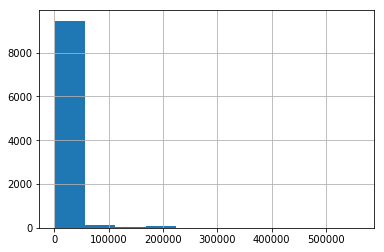

In [89]:
kc2.sqft_lot15.hist()

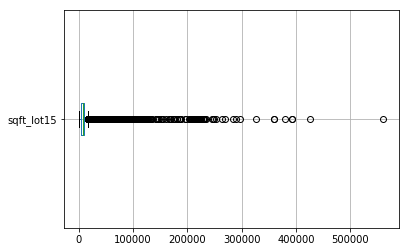

In [90]:
kc2.boxplot(column="sqft_lot15",vert=False)

In [91]:
IQR(kc2.sqft_lot15)

(4953.5, 17543.75, -2270.25)

In [92]:
len(kc2[kc2.sqft_lot15>17543.75])

986

In [93]:
len(kc2.zipcode.value_counts())

70

Observations & Alterations:
1.Duplicate ID values were eliminated with the latest dates.
2.Among all continuous variables, sqft_living seems to be normally distributed, the rest being skewed.
3.Though most of the variables have considerable outliers in univariate analysis, they seem to be roughly in accordance with the behaviour of other variables.
4.Building Age was computed with Yr_built variable.

## Multivariate Analysis:

In [94]:
#Visualising Linearity between Continuous Variables
kc3=kc2[["bedrooms","bathrooms","sqft_living","sqft_lot","condition","grade","building_age","sqft_living15","sqft_lot15"
,"price" ]]

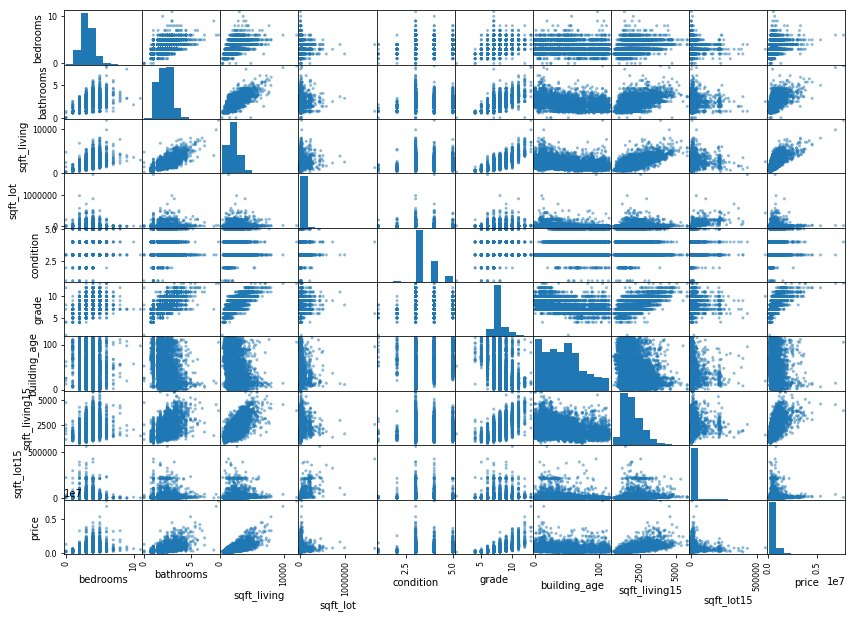

<Figure size 432x288 with 0 Axes>

In [95]:
from pandas.plotting import scatter_matrix
scatter_matrix((kc3), alpha=0.5, figsize=(14, 10),diagonal='hist')
plt.show()
plt.savefig("scatter matrix")

1.Only sqft_living,sqft_living15 and bathrooms seems to have some linear relatonship with price.We'll analyse it further.
2.Other than this, bathrooms and sqft_living has some linearity. 

In [96]:
kc2.sqft_living.corr(kc2.price)

0.7050394175047043

In [97]:
kc2.bathrooms.corr(kc2.price)

0.5284729395728225

In [98]:
kc2.sqft_living15.corr(kc2.price)

0.5839360251176811

In [99]:
#Correlation B/w all the variables
kc2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_age
id,1.000000,-0.008412,-0.000275,0.005469,-0.008593,-0.130681,0.007298,0.000743,0.022929,-0.016194,...,-0.007550,-0.003744,0.026532,-0.024726,-0.011626,0.007816,0.033133,-0.003030,-0.137861,-0.026532
price,-0.008412,1.000000,0.315943,0.528473,0.705039,0.094000,0.262771,0.275413,0.399270,0.042940,...,0.611578,0.322186,0.051084,0.120490,-0.054860,0.299041,0.022841,0.583936,0.077775,-0.051084
bedrooms,-0.000275,0.315943,1.000000,0.534061,0.592207,0.031071,0.193115,-0.006862,0.084855,0.029523,...,0.489579,0.316191,0.166780,0.020050,-0.158434,-0.014699,0.126088,0.399877,0.019982,-0.166780
bathrooms,0.005469,0.528473,0.534061,1.000000,0.759183,0.079532,0.502123,0.061587,0.183239,-0.116727,...,0.693175,0.281516,0.500556,0.045082,-0.201901,0.018118,0.217557,0.566764,0.068799,-0.500556
sqft_living,-0.008593,0.705039,0.592207,0.759183,1.000000,0.162695,0.365791,0.097238,0.285194,-0.049378,...,0.879063,0.435017,0.322801,0.043319,-0.203804,0.054007,0.239853,0.758076,0.163490,-0.322801
sqft_lot,-0.130681,0.094000,0.031071,0.079532,0.162695,1.000000,-0.003658,0.029368,0.099373,-0.008870,...,0.180926,-0.000824,0.053886,0.001174,-0.126115,-0.092593,0.224827,0.145160,0.719891,-0.053886
floors,0.007298,0.262771,0.193115,0.502123,0.365791,-0.003658,1.000000,0.022355,0.031729,-0.266288,...,0.534276,-0.242674,0.482107,0.012925,-0.064197,0.044814,0.133517,0.288602,-0.013267,-0.482107
waterfront,0.000743,0.275413,-0.006862,0.061587,0.097238,0.029368,0.022355,1.000000,0.403495,0.024049,...,0.064289,0.082323,-0.027221,0.101772,0.023713,-0.009474,-0.039385,0.097250,0.028466,0.027221
view,0.022929,0.399270,0.084855,0.183239,0.285194,0.099373,0.031729,0.403495,1.000000,0.058464,...,0.169947,0.276603,-0.056664,0.108254,0.076902,0.005131,-0.075724,0.291746,0.079978,0.056664
condition,-0.016194,0.042940,0.029523,-0.116727,-0.049378,-0.008870,-0.266288,0.024049,0.058464,1.000000,...,-0.154878,0.189074,-0.358944,-0.056320,0.004083,-0.018990,-0.106839,-0.082487,0.002102,0.358944


## Building the  LR model

Model 1:

In [100]:
import statsmodels.api as stm

In [101]:
#Validation dataset
kc_valid=pd.read_csv(r"C:\Users\MY PC\Desktop\e-files\Trimester-1\Machine_Learning\Term1 Assignments\wk3_kc_house_valid_data.csv\wk3_kc_house_valid_data.csv")

In [102]:
#Calling a method for LR model
def LinearReg(n):
    X_train = kc2[n]
    X_train = stm.add_constant(X_train)
    X_test  = kc_valid[n]
    X_test  = stm.add_constant(X_test)
    y_train = kc2.price
    y_test  = kc_valid.price
    
    mod = stm.OLS(y_train,X_train).fit()
    mod.params

    from sklearn.metrics import mean_squared_error,r2_score
    y_pred = mod.predict(X_test)
    rmse=(np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))
    print("RMSE:{} \n MSE:{} \n R2_Score:{}".format(rmse, mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)))


In [103]:
#Building the model with features having high correlation with price

#Model 1
LinearReg(["sqft_living","grade","bathrooms"])

C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


RMSE:242771.72353850963 
 MSE:58938109749.85877 
 R2_Score:0.5353969582873401


In [104]:
#Building a model having all continuous features

#Model 2
LinearReg(["sqft_living","sqft_lot","sqft_above"])

RMSE:255044.09062097248 
 MSE:65047488160.67879 
 R2_Score:0.48723735824778436


C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Though multicollinearity exists b/w sqft_living, sqft_above & sqft_basement, the model seems to predict the best fit line but the prediction remains to be close enough.

In [105]:
#Including Building age variable to the above model
kc_valid["building_age"]=2015-kc_valid["yr_built"] #Creating building_age variable in validation data

#Model 3
LinearReg(["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15","building_age"])


RMSE:243684.6651450417 
 MSE:59382216026.851295 
 R2_Score:0.5318961143001454


C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [106]:
LinearReg(["sqft_living","sqft_lot","sqft_above","building_age"])

C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


RMSE:247423.65997807737 
 MSE:61218467516.94762 
 R2_Score:0.5174211331501061


In [107]:
LinearReg(["sqft_living","grade","view","waterfront"])

C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


RMSE:228554.6345290272 
 MSE:52237220964.69734 
 R2_Score:0.5882193736138124


Though the collinearity of build_age was very low with price, still it seems to influence the prediction by increasing its accuracy.

In [108]:
#Building a model with previous features and including all ordinal features with ranks

#Model 4
LinearReg(["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15","building_age",'floors', 'waterfront', 'view', 'condition', 'grade'])

C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


RMSE:212281.16578526734 
 MSE:45063293347.15211 
 R2_Score:0.6447707052782277


A cumulative increase of 10% accuracy is observed made by all the ordinal variables. 

In [109]:
kc2.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'building_age'],
      dtype='object')

In [110]:
#Performig one hot encoding for zipcode and including it as features
kc3=kc2.copy()
zip_dummies=pd.get_dummies(kc3.zipcode) # getting dummy variables for all unique values of zipcode in a seperate dataframe
kc3=pd.concat([kc3,zip_dummies],axis=1) # adding the two dataframes
kc3=kc3.drop(['zipcode',98199],axis=1)  # Eliminating one column from unique values to avoid multicollinearity

#Repeating the procedure for validation set
zip_valid_dummies=pd.get_dummies(kc_valid.zipcode)
kc_valid=pd.concat([kc_valid,zip_valid_dummies],axis=1)
kc_valid=kc_valid.drop(['zipcode',98199],axis=1)


len(kc_valid.columns)



90

In [111]:
len(kc3.columns)

90

In [112]:
kc_valid.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
                 'lat',          'long', 'sqft_living15',    'sqft_lot15',
        'building_age',           98001,           98002,           98003,
                 98004,           98005,           98006,           98007,
                 98008,           98010,           98011,           98014,
                 98019,           98022,           98023,           98024,
                 98027,           98028,           98029,           98030,
                 98031,           98032,           98033,           98034,
                 98038,           98039,           98040,           98042,
                 98045,           98052,           98053,           98055,
                 98056,  

In [113]:
kc3.columns # Comparison of similarity of variables with train and validation datset

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
                 'lat',          'long', 'sqft_living15',    'sqft_lot15',
        'building_age',           98001,           98002,           98003,
                 98004,           98005,           98006,           98007,
                 98008,           98010,           98011,           98014,
                 98019,           98022,           98023,           98024,
                 98027,           98028,           98029,           98030,
                 98031,           98032,           98033,           98034,
                 98038,           98039,           98040,           98042,
                 98045,           98052,           98053,           98055,
                 98056,  

In [117]:
#Model 5

X_train = kc3.drop(['id', 'date', 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'condition','building_age','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
X_train = stm.add_constant(X_train)
X_test  = kc_valid.drop(['id', 'date', 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'condition','building_age','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
X_test  = stm.add_constant(X_test)
y_train = kc3.price
y_test  = kc_valid.price

mod = stm.OLS(y_train,X_train).fit()
mod.params

from sklearn.metrics import mean_squared_error,r2_score
y_pred = mod.predict(X_test)
rmse=(np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))
print("RMSE:{} \n MSE:{} \n R2_Score:{}".format(rmse, mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)))

C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


RMSE:163028.52914236466 
 MSE:26578301314.322735 
 R2_Score:0.7904859913798046


###  Testing the best model on Test Data:

In [118]:
kc_test=pd.read_csv(r"C:\Users\MY PC\Desktop\e-files\Trimester-1\Machine_Learning\Term1 Assignments\wk3_kc_house_test_data.csv\wk3_kc_house_test_data.csv")

In [119]:
kc_test["building_age"]=2015-kc_test["yr_built"] # including building_agevariable in test data

#genearting dummies for test data
zip_test_dummies=pd.get_dummies(kc_test.zipcode)
kc_test=pd.concat([kc_test, zip_test_dummies],axis=1)
kc_test=kc_test.drop(['zipcode',98199],axis=1)


In [ ]:
len(kc_test.columns.value_counts())

In [ ]:
kc_test.columns #checking for similarity of variables with train data

In [121]:
X_train = kc3.drop(['id', 'date', 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'condition','building_age','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
X_train = stm.add_constant(X_train)
X_test  = kc_test.drop(['id', 'date', 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'condition','building_age','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
X_test  = stm.add_constant(X_test)
y_train = kc3.price
y_test  = kc_test.price

mod = stm.OLS(y_train,X_train).fit()
mod.params

from sklearn.metrics import mean_squared_error,r2_score
y_pred = mod.predict(X_test)
rmse=(np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))
print("RMSE:{} \n MSE:{} \n R2_Score:{}".format(rmse, mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)))

C:\Users\MY PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


RMSE:158323.8734090571 
 MSE:25066448891.24714 
 R2_Score:0.8047914657219291


Note: The zipcodes in training, validation and test data have same unique values and no. of variables. Hence these individual datsets can be compared for prediction.